
# Regular Expressions

## 10/19/2023

<a href="?print-pdf">print view</a>

<a href="regex.ipynb">notebook</a>


In [91]:
%%html
<script src="https://bits.csb.pitt.edu/preamble.js"></script>

<img width="400" src="https://imgs.xkcd.com/comics/regular_expressions.png">

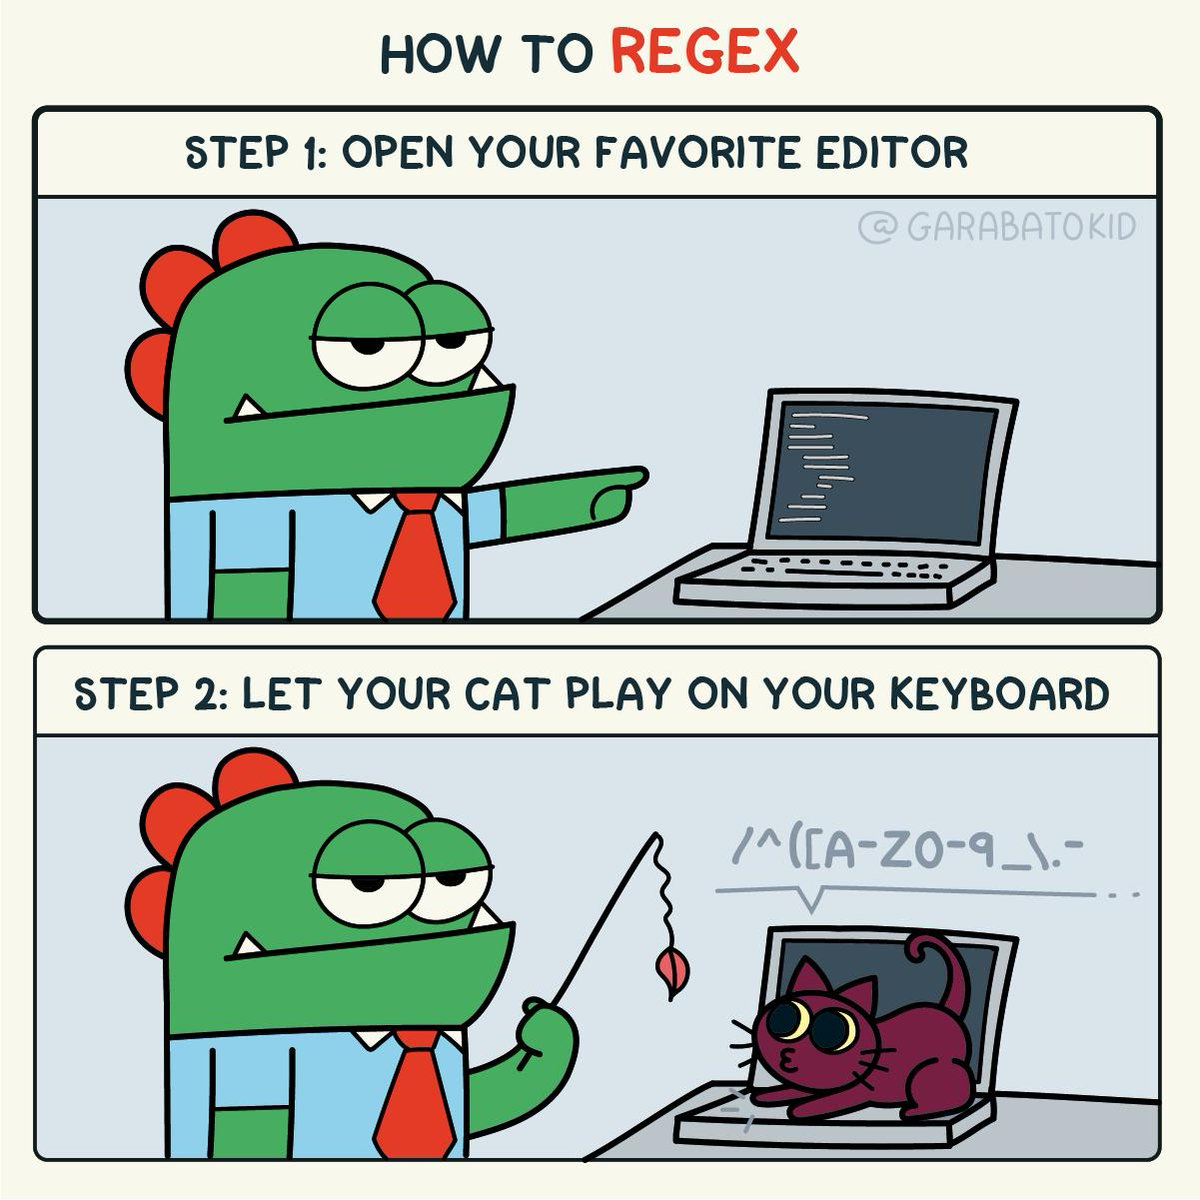

# Anti-Patterns

*An [anti-pattern](https://en.wikipedia.org/wiki/Anti-pattern) is a common response to a recurring problem that is usually ineffective and risks being highly counterproductive.*

Anti-Pattern**s**:

In [92]:
import sys
sys.argv.append('3.0')
length = 100
values = [3]*100

In [93]:
frame = 0
while frame < length:
    if values[frame] < float(sys.argv[3]):
        pass #do something
    frame += 1

Pythonic Pattern:

In [94]:
cutoff = float(sys.argv[3])
for value in values:
    if value < cutoff:
        pass #dostuff

**Antipattern**: Not using numpy broadcasting

In [95]:
import numpy as np
array = np.array([0,2,.5,.5,1.3])
cutoff = 1.0

In [96]:
cnt = 0
for i in range(len(array)):
    if array[i] < cutoff:
        cnt += 1
cnt        

3

Pythonic Pattern:

In [97]:
np.count_nonzero(array < cutoff)

3

**Antipattern**: Expanding generators

In [98]:
for i in list(range(3)):
    pass

Python Pattern:

In [99]:
for i in range(3):
    pass

**Efficiency**:  Use sets for membership testings... **but** don't keep converting from a list.

**Bad**

In [100]:
L = [1,2,3]
for i in range(10):
    if i in set(L):
        pass

**Good**

In [101]:
L = set([1,2,3])
for i in range(10):
    if i in L:
        pass

# `re`

A *regular expression* is a way to match text patterns.  

It is specified with a `string` and is compiled to a regular expression object that can be used for searching and other pattern-using operations.

Patterns can get pretty complicated and are not limited to exact string matches (but for now we'll stick with exact string matching since it's easy to understand).

In [102]:
import re
regex = re.compile('abc')
regex

re.compile(r'abc', re.UNICODE)

# Matching vs Searching

`match` and `search` apply the regex to the passsed string

In [103]:
regex = re.compile('abc')
regex.search('xyzabc')

<re.Match object; span=(3, 6), match='abc'>

`match` must match starting at the begining of the string.

In [104]:
print(regex.match('xyzabc')) #matches at beginning of line only

None


Advice: use `search` and pretend `match` doesn't exist to avoid confusion

# Extracting

In addition to searching for a particular pattern, a regular expression can be used to extract parts of the pattern using *groups*.

A group is defined using parentheses.

In [105]:
regex = re.compile('(abc)def')
match = regex.search('xyzabcdef')

The returned `MatchObject` can be used to extract all the contents of the groups.

In [106]:
match.groups()

('abc',)

# Groups

In [107]:
match.group(1)

'abc'

In [108]:
match.group(0) #group zero is always the whole match

'abcdef'

In [109]:
regex = re.compile('(a(b(c)))def')
match = regex.search('xyzabcdefg')

In [112]:
%%html
<div id="regroups" style="width: 500px"></div>
<script>

    var divid = '#regroups';
	jQuery(divid).asker({
	    id: divid,
	    question: "How many groups are in match?",
		answers: ['0','1','2','3','4'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

In [113]:
match.groups()

('abc', 'bc', 'c')

In [114]:
match.group(0)

'abcdef'

# Using Regular Expressions

You can compile your regular expression into a RegexObject, or you can use `re` methods directly and it will compile them for you automatically.

The `re` package will cache your most recently used `RegexpObject`s.  However, if you are using a lot of regular expressions, particularly inside of loops, you should probably compile them once outside the loop and use the resulting `RegexpObject` directly.

In [115]:
re.search('abc','abcxyz') # this searches the string 'abcxyz' using the regex 'abc'

<re.Match object; span=(0, 3), match='abc'>

In [116]:
regex = re.compile('abc')
regex.search('abcxyz') #same as above

<re.Match object; span=(0, 3), match='abc'>

# Regular Expression Syntax

# The Backslash Problem

Unlike Perl, where regular expressions are distinct from string literals, in Python we specify regular expressions as strings.

String literals use the backslash (`\`) to escape special characters.

Regular expressions use the backslash to escape special characters.

So how would we write a regular expression that matches `\x\`?

In [117]:
%%html
<div id="reslashes" style="width: 500px"></div>
<script>

    var divid = '#reslashes';
	jQuery(divid).asker({
	    id: divid,
	    question: "How would you write a regular expression to match \\x\\?",
		answers: ['\\x\\','\\\\x\\\\','\\\\\\x\\\\\\','\\\\\\\\x\\\\\\\\'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

In [118]:
firsttry = '\x\'

SyntaxError: EOL while scanning string literal (673471912.py, line 1)

In [119]:
secondtry = '\\x\\'

In [120]:
print(secondtry,len(secondtry))

\x\ 3


In [121]:
regex = re.compile(secondtry)

error: bad escape (end of pattern) at position 2

In [122]:
thirdtry = '\\\\x\\\\'

In [123]:
print(thirdtry,len(thirdtry))

\\x\\ 5


In [124]:
regex = re.compile(thirdtry)

In [125]:
regex.search('\\x\\')

<re.Match object; span=(0, 3), match='\\x\\'>

# Raw Strings

Python let's you specify a *raw string literal* where backslashes aren't escaped.

Raw string have an `r` before the string literal.

**Use raw strings for regular expressions.**

In [126]:
normal_str = '\\x\\'
raw_str = r'\\x\\'

In [127]:
print(normal_str,raw_str)

\x\ \\x\\


Slight detail: raw strings can't end with an odd number of backslashes

In [128]:
print(r'\x\')

SyntaxError: EOL while scanning string literal (2066912133.py, line 1)

# Operators

`regex1|regex2`  

Match either regex1 or regex2

In [129]:
bool(re.search(r'a|b','xxxaxxx'))

True

In [130]:
bool(re.search(r'abc|xyz','axbycz'))

False

In [131]:
bool(re.search(r'abc|xyz','xxxyzxxx'))

True

# Operators: multiple matches

<table>
<tr><td>regex* </td><td>Match regex zero or more times (Kleene star)</td></tr>
<tr><td>regex? </td><td>Match regex one or zero times</td></tr>
<tr><td>regex+ </td><td>Match regex one or more times</td></tr>
<tr><td>regex{m}</td><td> Match regex `m` times</td></tr>
<tr><td>regex{m,n} </td><td>Match regex between `m` and `n` times (as many as possible)</td></tr>
</table>

In [132]:
bool(re.search(r'a*','xxxxx'))

True

In [133]:
bool(re.search(r'a+','xxxxx'))

False

In [134]:
m = re.search(r'a+(.*)','aaba')

In [136]:
%%html
<div id="regreedy" style="width: 500px"></div>
<script>

    var divid = '#regreedy';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is m.group(1)?",
		answers: ['a','b','ba','ab','aba','aaba'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

In [137]:
m.groups()

('ba',)

# Non-greedy Kleene

Multiple matching is greedy by default and will match as much as possible.  To match as few characters as possible, use `*?`, `??`, and `+?`.

In [138]:
m1 = re.search(r'a*(.*)','aaba')
m2 = re.search(r'a+(.*)','aaba')

In [139]:
m1.groups(),m2.groups()

(('ba',), ('ba',))

In [140]:
m3 = re.search(r'a*?(.*)','aaba')

In [141]:
m3 = re.search(r'a*?(.*)','aaba')

In [142]:
%%html
<div id="remstar3" style="width: 500px"></div>
<script>

    var divid = '#remstar3';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is m3.group(1)?",
		answers: ['aaba','aba','ba','ABBA'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

In [143]:
m3.groups()

('aaba',)

In [144]:
m = re.search(r'a+?(.*)','aaba')

In [145]:
%%html
<div id="rem1" style="width: 500px"></div>
<script>

    var divid = '#rem1';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is m.group(1)?",
		answers: ['aaba','aba','ba','ABBA'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

In [146]:
m.group(1)

'aba'

# Special Characters

`.` Matches any character (except newline, by default)<br>
`^` Matches start of string<br>
&#36; Matches end of string<br>

In [147]:
bool(re.search('^abc','xyzabc'))

False

In [148]:
bool(re.search('abc$','xyzabc'))

True

Keep in mind that if you want to match a special character, `.^$()[]|*+?{}`, you need to escape it with backslash. 

# Character Sets

`[]` specifies a set of characters

In [149]:
m = re.search(r'([0-9])','BST3')

In [150]:
m.groups()

('3',)

In [151]:
m = re.search(r'([cat])','garfield')

In [152]:
%%html
<div id="reset" style="width: 500px"></div>
<script>

    var divid = '#reset';
	jQuery(divid).asker({
	    id: divid,
	    question: "What's in m.group(1)?",
		answers: ['Nothing','cat','c','a','t','garfield'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

In [153]:
m.group(1)

'a'

# Character Set Complements

The *complement* of the character set is taken if `^` is the first character.

In [154]:
r3 = re.compile(r'([^ ]*)')
m3 = r3.search('Hello World')
m3.groups()

('Hello',)

# Predefined Character Sets

`\d` Matches decimal digit<br>
`\D` Matches non-decimal digit

`\s` Matches whitespace character<br>
`\S` Matches non-whitespace character

`\w` Matches alphanumeric characters and underscore `[A-Za-z0-9_]`<br>
`\W` Matches nonalphanumeric `[^A-Za-z0-9_]`

In [155]:
re.search(r'(\w+)-(\w+)','de-hyphen').groups()

('de', 'hyphen')

In [156]:
float_regex = re.compile(r'[+-]?(\d+(\.\d*)?|\.\d+)([eE][+-]?\d+)?')

In [157]:
float_regex.match('3.14159')

<re.Match object; span=(0, 7), match='3.14159'>

In [158]:
r = re.compile(r'\d?\d.(png|jpg)')

In [160]:
%%html
<div id="reex1" style="width: 500px"></div>
<script>

    var divid = '#reex1';
	jQuery(divid).asker({
	    id: divid,
	    question: "Which string will NOT match",
		answers: ['0.png','15.jpg','93png','100.jpg'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# Groups

We can extract parts of a match using groups.

In [161]:
m = re.search(r'(\w*)@pitt\.edu','dkoes@pitt.edu')
m.group(1)

'dkoes'

Groups can be referenced within the regular expression with `\number` where `number` is from 1 to 99

In [162]:
regex = re.compile(r'(\w+)\s+\1')
m1 = regex.search('cat cat')
m2 = regex.search('cat dog')
m1.groups(),m2

(('cat',), None)

# Named Groups

Groups can be named with `(?P<name>...)`

In [163]:
regex = re.compile(r'(?P<last>\w+), (?P<first>\w+)')
m = regex.search('Koes, David')
print(m.group('first'),m.group('last'))

David Koes


Named groups can be referenced by name within the regular expression.

In [164]:
regex = re.compile(r'(?P<animal>\w+)\s+(?P=animal)')
m1 = regex.search('cat cat')
m1.groups()

('cat',)

# Compiling Regular Expressions


Compiling to a RegexpObject also let's you provide some flags:

* `re.IGNORECASE` - case insensitive matching
* `re.DOTALL` - make the dot character match newlines
* `re.MULTILINE` - ^ and $ will match begining/end of *lines* in addition to the string


In [165]:
print(re.search(r'^cat$','cat\ndog'))

None


In [166]:
regex = re.compile(r'^cat$',re.MULTILINE)
regex.search('cat\ndog')

<re.Match object; span=(0, 3), match='cat'>

# More Regular Expression Functions

The same functions are available both as standalone functions in `re` (which take a regular expression in string form) and as methods of a `RegexpObj`.

* `search` Scan through a string looking for where a regular expression produces a match, and return a MatchObject.
* `match` Return a MatchObject of regular expression matches at *beginning* of string.
* `split` Split a string by occurances of pattern.
* `findall` Return all non-overlapping matches of the regular expression as strings. 
* `finditer` Return an iterator yielding MatchObject instances over all non-overlapping matches of the regular expression
* `sub` Return a string obtained by substituting matches of the regular expression with a provided string

# `split`

In [167]:
re.split(r'\s+',"A bunch of   spacey\nwords.")

['A', 'bunch', 'of', 'spacey', 'words.']

If matching groups are included, then the matches are included in the returned list

In [168]:
re.split(r'(\s+)',"A bunch of   spacey\nwords.")

['A', ' ', 'bunch', ' ', 'of', '   ', 'spacey', '\n', 'words.']

# `findall`

Returns matches as strings.  
 * If no groups, returns full match
 * If single group, returns string of that group's match
 * If multiple groups, returns tuple of strings

In [169]:
bigstr = 'abc xyz abc a x'
re.findall('abc',bigstr)

['abc', 'abc']

In [170]:
re.findall(r'(a)bc',bigstr)

['a', 'a']

In [171]:
re.findall(r'(a)b(c)',bigstr)

[('a', 'c'), ('a', 'c')]

In [172]:
matches = re.findall(r'(\S+)|(\S+)','x|y a|b')

In [173]:
%%html
<div id="reexfindall" style="width: 500px"></div>
<script>
    var divid = '#reexfindall';
	jQuery(divid).asker({
	    id: divid,
	    question: "What is in matches[0]",
		answers: ["('x','y')","('x|y')","'x|y'","('x|y','')",'Error'],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

In [174]:
matches

[('x|y', ''), ('a|b', '')]

# `finditer`

In [175]:
list_of_names = 'Koes, David\nKarplus, Martin\nLevitt, Michael\nWarshel, Arieh\n'

In [176]:
for m in re.finditer(r'(?P<last>\w+), (?P<first>\w+)',list_of_names):
    print(m.group('first'),m.group('last'))

David Koes
Martin Karplus
Michael Levitt
Arieh Warshel


# `sub`

In [177]:
pdb = '''ATOM   2267  N   THR A 609       4.155  42.962  60.898  1.00  9.19           N  
ATOM   2268  CA  THR A 609       3.520  44.246  60.575  1.00 10.78           C  
ATOM   2269  C   THR A 609       4.491  45.117  59.815  1.00 11.13           C  
ATOM   2270  O   THR A 609       5.689  44.864  59.853  1.00  9.92           O'''

print(re.sub(r' A ',' B ',pdb))

ATOM   2267  N   THR B 609       4.155  42.962  60.898  1.00  9.19           N  
ATOM   2268  CA  THR B 609       3.520  44.246  60.575  1.00 10.78           C  
ATOM   2269  C   THR B 609       4.491  45.117  59.815  1.00 11.13           C  
ATOM   2270  O   THR B 609       5.689  44.864  59.853  1.00  9.92           O


# Some Theory

A regular expression describes a *regular language* in formal language theory. 

A formal language is a set of symbols and rules for constructing strings from these symbols.  All programming languages are formal languages, although none are regular languages (usually context free grammars).

<img src='http://upload.wikimedia.org/wikipedia/commons/thumb/1/1c/Kleene.jpg/421px-Kleene.jpg' width='300'> Stephen Kleene, American mathematician and inventor of regular expressions.

# Regular Languages

The following are equivalent:

* A language is regular
* A language can be recognized by a regular expression
* A language can be recognized by a finite automata (finite state machine)

# Finite Automata

<center><img width="400" src="http://upload.wikimedia.org/wikipedia/commons/thumb/9/9d/DFAexample.svg/500px-DFAexample.svg.png"></center> <font size="5">1&#42;(01&#42;01&#42;)&#42;</font>

This FSM and regular expression matches all binary strings with an even number of zeros.

\* is the *Kleene star* and matches zero or more copies of the preceeding expression.

Finite state machines are **finite**.  This means they cannot count arbitrarily high.  For example, it is impossible to write an regular expression for balanced parentheses.

When you compile a regular expression, you are creating a FSM.  When you search, the string is run through the FSM which takes time linear in the length of the string (*no backtracking*).

# Exercise

Consider the file `alignment.txt`.  This is the saved result of a blast query.

In [178]:
!wget http://mscbio2025.csb.pitt.edu/files/alignment.txt

--2023-10-18 21:56:26--  http://mscbio2025.csb.pitt.edu/files/alignment.txt
Resolving mscbio2025.csb.pitt.edu (mscbio2025.csb.pitt.edu)... 136.142.4.139
Connecting to mscbio2025.csb.pitt.edu (mscbio2025.csb.pitt.edu)|136.142.4.139|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86458 (84K) [text/plain]
Saving to: ‘alignment.txt’

alignment.txt       100%[===================>]  84.43K  --.-KB/s    in 0.02s   

2023-10-18 21:56:27 (4.52 MB/s) - ‘alignment.txt’ saved [86458/86458]



In [179]:
!head alignment.txt

BLASTP 2.2.28+
Reference: Stephen F. Altschul, Thomas L. Madden, Alejandro
A. Schaffer, Jinghui Zhang, Zheng Zhang, Webb Miller, and
David J. Lipman (1997), "Gapped BLAST and PSI-BLAST: a new
generation of protein database search programs", Nucleic
Acids Res. 25:3389-3402.


Reference for compositional score matrix adjustment: Stephen
F. Altschul, John C. Wootton, E. Michael Gertz, Richa


## Answer these questions using regular expressions

What is the average length of the sequences returned?

How many sequences are from the pdb?

Can you extract just the subject sequences?

In [180]:
data = open('alignment.txt').read()